#K-Nearest-Neighbor Analysis
In python.  
With SKLEARN.  

##Approach:  
1. Load the Iris dataset.  
2. Pick a point at random.  
3. Classify that point using a custom kNN implementation.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [3]:
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR',
 '__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'data',
 'feature_names',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'target',
 'target_names',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [5]:
X = iris.data[:,0] #length
Y = iris.data[:,1] #width
label = iris.target #Species

In [6]:
species_key = {0:'setosa',1:'versicolor',2:'virginica'}

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(data={'length':X,'width':Y,'species':label},index=[i for i in range(0,len(Y))])

In [9]:
df.head()

,length,species,width
0,5.1,0,3.5
1,4.9,0,3.0
2,4.7,0,3.2
3,4.6,0,3.1
4,5.0,0,3.6


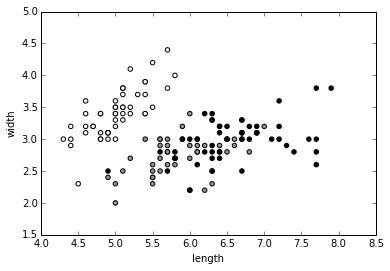

In [10]:
#Visualize the iris dataset on a scatter plot
%matplotlib inline
df[["length",'width']].plot(x='length',y='width',kind='scatter',c=df["species"])

In [11]:
df.describe()

,length,species,width
count,150.000000,150.000000,150.000000
mean,5.843333,1.000000,3.054000
std,0.828066,0.819232,0.433594
min,4.300000,0.000000,2.000000
25%,5.100000,0.000000,2.800000
50%,5.800000,1.000000,3.000000
75%,6.400000,2.000000,3.300000
max,7.900000,2.000000,4.400000


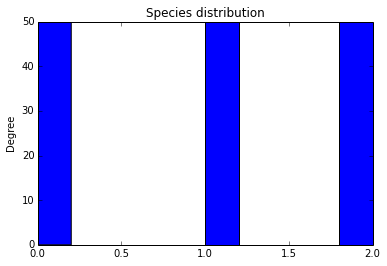

In [12]:
#Determine the species distribution within the dataset
df["species"].plot(kind='hist', title="Species distribution")
#50 of each species present in the dataset.

In [13]:
df.head()

,length,species,width
0,5.1,0,3.5
1,4.9,0,3.0
2,4.7,0,3.2
3,4.6,0,3.1
4,5.0,0,3.6


Using map/apply to apply functions across series and dataframes:

In [14]:
def printer(x):
    a,b,c = x[0],x[1],x[2]
    return a,b,c


In [15]:
result = df.apply(printer,axis=1)
result[0:5]

0    (5.1, 0.0, 3.5)
1    (4.9, 0.0, 3.0)
2    (4.7, 0.0, 3.2)
3    (4.6, 0.0, 3.1)
4    (5.0, 0.0, 3.6)
dtype: object

In [16]:
def subtractor(x):
    a,b,c = x[0],x[1],x[2]
    result = a-c
    return result

In [17]:
result2 = df.apply(subtractor,axis=1)

In [18]:
result2.head()

0    1.6
1    1.9
2    1.5
3    1.5
4    1.4
dtype: float64

In [19]:
#Lets do it as a lambda fn:
f = lambda x:x[0]- x[2]

Syntax for writing lambda functions to map/apply (on axis=1):

Lambda syntax:
lambda x,y (<- input variables): x+y (function operation)

The apply function will take a dataframe and feed it into a function column or row wise.

x:x[0]
First element of the function will provide the input, in this case a single dataframe is being input into the function.  Then the first column of the dataframe is being sliced (with no operation applied).

x:x[0] + x[1]
In this example we, we are providing the df x, and then adding the first and second columns.

x:x[1] - x[0]
In this example we are providing df x and subtracting the value from column 1 minus the value in column 0.

x:x[1] / x[2] 
Now dividing second column by the third column.  

In [20]:
result3 = df.apply(f,axis=1)

In [21]:
result3.head()
#works.

0    1.6
1    1.9
2    1.5
3    1.5
4    1.4
dtype: float64

In [22]:
#Writing functions with positional arguments:
def preDef_subtract(data,x,y):
    a = data[0]
    return a,a+x+y

In [23]:
result4 = df.apply(preDef_subtract,args=(1,2),axis=1)

In [24]:
result4.head()
#Positional arguments working.

0    (5.1, 8.1)
1    (4.9, 7.9)
2    (4.7, 7.7)
3    (4.6, 7.6)
4    (5.0, 8.0)
dtype: object

Implement the kNN Function:

In [25]:
import random
#Define knn function:

def calc_distance(data,X1,Y1):
    """Calculate the euclidean distance between two points
    X = length
    Y = width
    """
    X2,Y2 = data[0],data[2]
    return ((X2-X1)**2 +(Y2-Y1)**2)**0.5

def kNN(k,input_df,X1,Y1):
    """Input dataframe and point coords for classification.
    Returns class of input point."""
    df = input_df.copy()
    df["euc_distance"] = df.apply(calc_distance,args=(X1,Y1),axis=1) #Use positional args to pass df and random coords.
    df.sort(['euc_distance'],inplace=True)
    voted_class = df['species'][0:int(k)].mode()[0] #This function is only reliable for k >=3
    return voted_class

def parse_results(results,start_k):
    for i,v in enumerate(results):
        print "When k={0},label={1}".format(i+start_k,v)
        
def plot_results(df,X1,Y1):
    append_dict = {'length':X1,'width':Y1,'species':3}
    df_plot = df.append(append_dict,ignore_index=True)
    ax1 = df_plot[["length",'width']].plot(x='length',y='width',kind='scatter',c=df_plot["species"],cmap=plt.cm.Accent)
    ax1.annotate("",xy=(X1,Y1),xytext=(X1+0.2,Y1+0.2),arrowprops=dict(arrowstyle='-|>', color='r'))
    
def run_KNN(df,start_k,stop_k):
    species_key = {0:'setosa',1:'versicolor',2:'virginica'}
    X1 = random.uniform(4.0,8.0)
    Y1 = random.uniform(2.0,5.0)
    results = [species_key[kNN(i,df,X1,Y1)] for i in range(start_k,stop_k)]
    parse_results(results,start_k)
    plot_results(df,X1,Y1)
    return results
 

When k=3,label=setosa
When k=4,label=setosa
When k=5,label=setosa
When k=6,label=setosa
When k=7,label=setosa
When k=8,label=setosa
When k=9,label=setosa
When k=10,label=setosa
When k=11,label=setosa
When k=12,label=setosa
When k=13,label=setosa
When k=14,label=setosa
When k=15,label=setosa
When k=16,label=setosa
When k=17,label=setosa
When k=18,label=setosa
When k=19,label=setosa


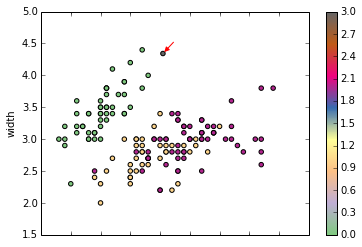

In [26]:
#Run 1
results = run_KNN(df,3,20)

When k=3,label=setosa
When k=4,label=setosa
When k=5,label=setosa
When k=6,label=setosa
When k=7,label=setosa
When k=8,label=setosa
When k=9,label=setosa
When k=10,label=setosa
When k=11,label=virginica
When k=12,label=virginica
When k=13,label=virginica
When k=14,label=virginica
When k=15,label=virginica
When k=16,label=virginica
When k=17,label=virginica
When k=18,label=virginica
When k=19,label=virginica


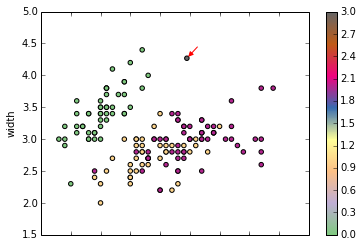

In [27]:
#Run 2
results = run_KNN(df,3,20)

When k=3,label=setosa
When k=4,label=setosa
When k=5,label=setosa
When k=6,label=setosa
When k=7,label=setosa
When k=8,label=setosa
When k=9,label=setosa
When k=10,label=setosa
When k=11,label=setosa
When k=12,label=setosa
When k=13,label=setosa
When k=14,label=setosa
When k=15,label=setosa
When k=16,label=setosa
When k=17,label=setosa
When k=18,label=setosa
When k=19,label=setosa


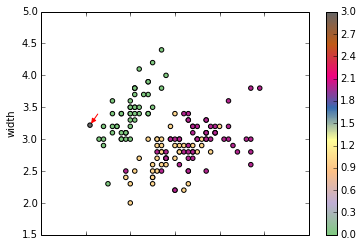

In [28]:
#Run 3
results = run_KNN(df,3,20)

When k=3,label=virginica
When k=4,label=virginica
When k=5,label=virginica
When k=6,label=virginica
When k=7,label=virginica
When k=8,label=virginica
When k=9,label=virginica
When k=10,label=virginica
When k=11,label=virginica
When k=12,label=virginica
When k=13,label=virginica
When k=14,label=virginica
When k=15,label=virginica
When k=16,label=virginica
When k=17,label=virginica
When k=18,label=virginica
When k=19,label=virginica


['virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica']

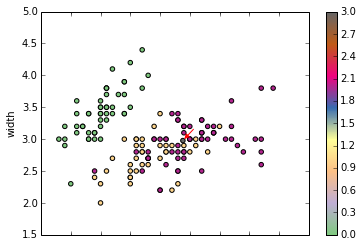

In [29]:
run_KNN(df,3,20)

When k=3,label=virginica
When k=4,label=virginica
When k=5,label=virginica
When k=6,label=virginica
When k=7,label=virginica
When k=8,label=virginica
When k=9,label=virginica
When k=10,label=virginica
When k=11,label=virginica
When k=12,label=virginica
When k=13,label=virginica
When k=14,label=virginica
When k=15,label=virginica
When k=16,label=virginica
When k=17,label=virginica
When k=18,label=virginica
When k=19,label=virginica


['virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica']

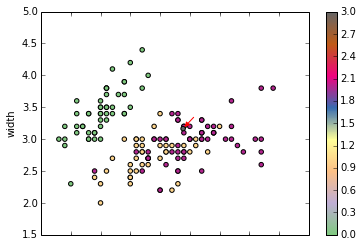

In [30]:
run_KNN(df,3,20)

In [94]:
def kNN_wrapper(test_df,k):
    X,Y= test_df[0], test_df[2]
    return kNN(k,df,X,Y)

In [59]:
#Apply predictions to data:
predict_df = df.copy()
predict_df["k=4"] =predict_df.apply(kNN_wrapper,axis=1)

In [84]:
#Generate confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(predict_df["species"],predict_df["k=4"])
confusion_matrix

array([[49,  1,  0],
       [ 0, 43,  7],
       [ 0, 17, 33]])

<matplotlib.colorbar.Colorbar instance at 0x1133a2200>

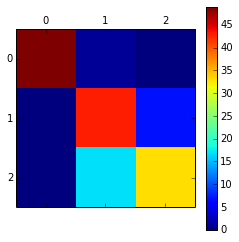

In [71]:
plt.matshow(confusion_matrix)
plt.colorbar()

In [73]:
predict_df["k=5"] =predict_df.apply(kNN_wrapper,axis=1)

In [89]:
predict_df.head()

,length,species,width,k=4,k=5
0,5.1,0,3.5,0,0
1,4.9,0,3.0,0,0
2,4.7,0,3.2,0,0
3,4.6,0,3.1,0,0
4,5.0,0,3.6,0,0


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(predict_df["species"],predict_df["k=5"])
confusion_matrix2

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0,  9, 41]])

In [87]:
confusion_matrix3 = confusion_matrix(predict_df["species"],predict_df["k=5"])
confusion_matrix3

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0,  9, 41]])

In [88]:
confusion_matrix4 = confusion_matrix(predict_df["species"],predict_df["k=5"])
confusion_matrix4

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0,  9, 41]])

In [98]:
def kNN_wrapper(test_df,k):
    X,Y= test_df[0], test_df[2]
    return kNN(k,df,X,Y)

predict_df= df.copy()
predict_df["k=6"] =predict_df.apply(kNN_wrapper,args=(6,),axis=1)

In [101]:
confusion_matrix6 = confusion_matrix(predict_df["species"],predict_df["k=6"])
confusion_matrix6

array([[49,  1,  0],
       [ 0, 43,  7],
       [ 0, 20, 30]])

In [102]:
predict_df["k=5"] =predict_df.apply(kNN_wrapper,args=(5,),axis=1)
confusion_matrix5 = confusion_matrix(predict_df["species"],predict_df["k=6"])
confusion_matrix5

array([[49,  1,  0],
       [ 0, 43,  7],
       [ 0, 20, 30]])

In [103]:
predict_df["k=4"] =predict_df.apply(kNN_wrapper,args=(4,),axis=1)
confusion_matrix4 = confusion_matrix(predict_df["species"],predict_df["k=4"])
confusion_matrix4

array([[49,  1,  0],
       [ 0, 43,  7],
       [ 0, 17, 33]])

In [104]:
predict_df["k=10"] =predict_df.apply(kNN_wrapper,args=(10,),axis=1)
confusion_matrix10 = confusion_matrix(predict_df["species"],predict_df["k=10"])
confusion_matrix10

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 17, 33]])

In [105]:
predict_df["k=15"] =predict_df.apply(kNN_wrapper,args=(15,),axis=1)
confusion_matrix15 = confusion_matrix(predict_df["species"],predict_df["k=15"])
confusion_matrix15

array([[50,  0,  0],
       [ 0, 33, 17],
       [ 1, 11, 38]])

In [109]:
#Can interact with the confusion matrix ojbect:
confusion_matrix15[1][1]

33

In [110]:
dir(confusion_matrix)

['__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__hash__',
 '__init__',
 '__module__',
 '__name__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'func_closure',
 'func_code',
 'func_defaults',
 'func_dict',
 'func_doc',
 'func_globals',
 'func_name']